# Importing libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
%matplotlib inline

In [60]:
df=pd.read_csv('train_LZdllcl.csv')

In [61]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [63]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


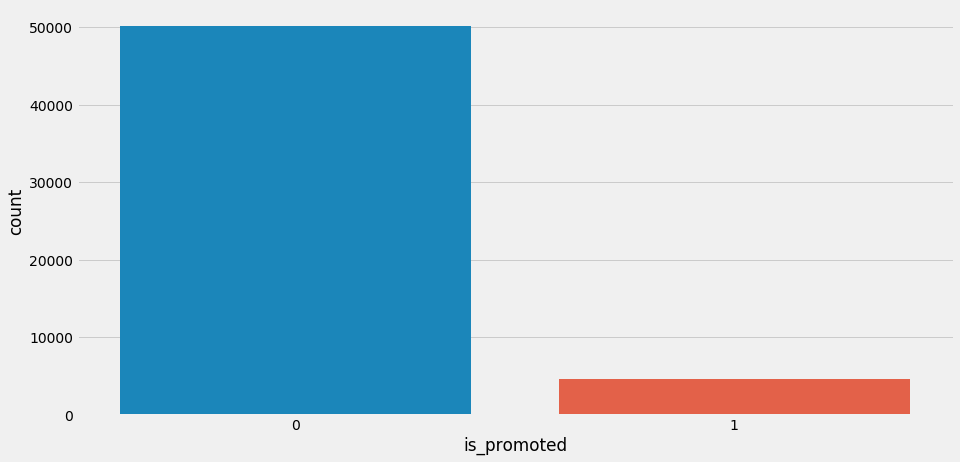

In [64]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,7))
sns.countplot(df.is_promoted)

In [65]:
numeric_features=df.select_dtypes(include=[np.number])
numeric_features.dtypes

employee_id               int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [66]:
numeric_features=numeric_features.drop(['employee_id','KPIs_met >80%','awards_won?','is_promoted'],axis=1)

In [67]:
numeric_features.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
no_of_trainings,1.000000,-0.081278,-0.063126,-0.057275,0.042517
age,-0.081278,1.000000,0.006008,0.657111,-0.048380
previous_year_rating,-0.063126,0.006008,1.000000,0.000253,0.075139
length_of_service,-0.057275,0.657111,0.000253,1.000000,-0.038122
avg_training_score,0.042517,-0.048380,0.075139,-0.038122,1.000000


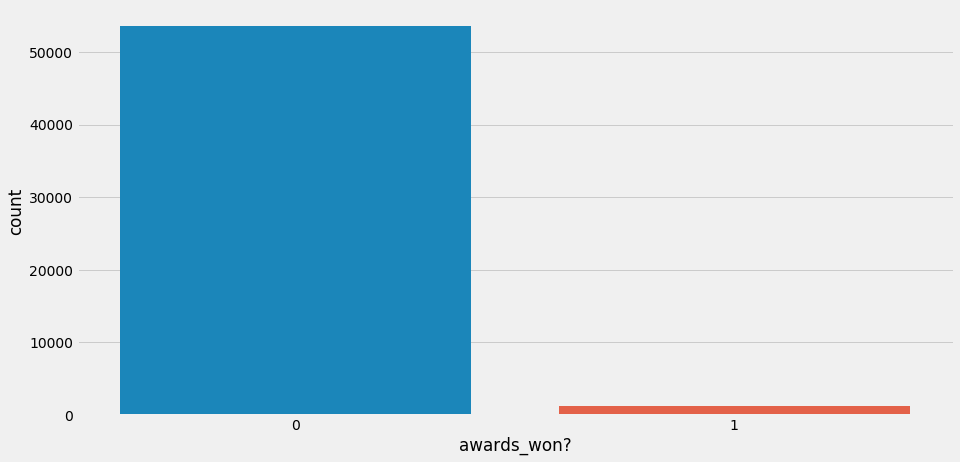

In [68]:
plt.figure(figsize=(14,7))
sns.countplot(df['awards_won?'])

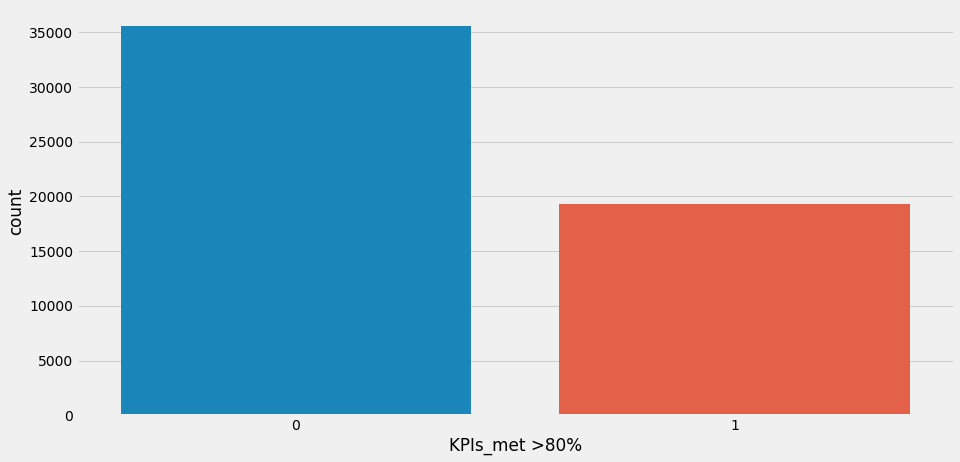

In [69]:
plt.figure(figsize=(14,7))
sns.countplot(df['KPIs_met >80%'])

In [70]:
df['KPI']=df['KPIs_met >80%']
df['award']=df['awards_won?']
df=df.drop(['KPIs_met >80%','awards_won?'],axis=1)

In [71]:
colNames=df.columns

for i in colNames:
    print("Unique values of ",i," ",df[i].unique(),'\n')

Unique values of  employee_id   [65438 65141  7513 ... 13918 13614 51526] 

Unique values of  department   ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal'] 

Unique values of  region   ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18'] 

Unique values of  education   ["Master's & above" "Bachelor's" nan 'Below Secondary'] 

Unique values of  gender   ['f' 'm'] 

Unique values of  recruitment_channel   ['sourcing' 'other' 'referred'] 

Unique values of  no_of_trainings   [ 1  2  3  4  7  5  6  8 10  9] 

Unique values of  age   [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40

remove null values

In [72]:
education_mode=df.pivot_table(columns='education',values='is_promoted',aggfunc=lambda x:x.mode())

In [73]:
education_mode

education,Bachelor's,Below Secondary,Master's & above
is_promoted,0,0,0


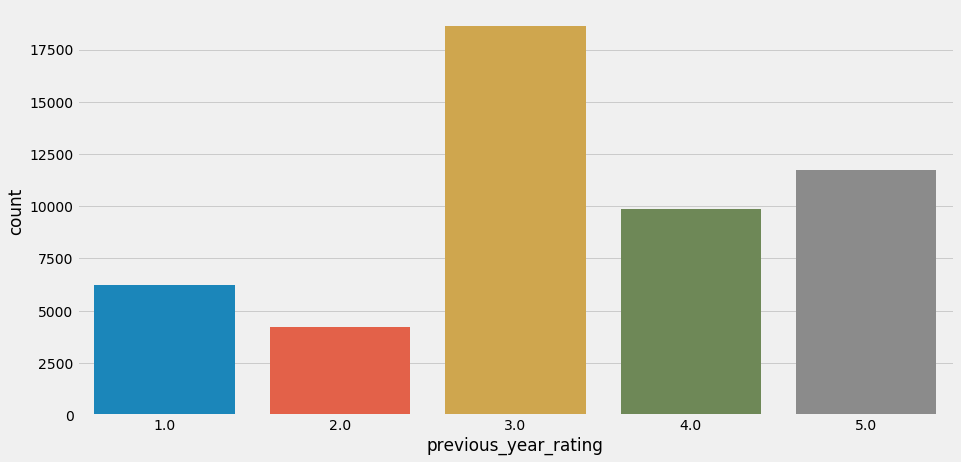

In [74]:
plt.figure(figsize=(14,7))
sns.countplot(df.previous_year_rating)

In [75]:
df.isnull().sum()/len(df)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
avg_training_score      0.000000
is_promoted             0.000000
KPI                     0.000000
award                   0.000000
dtype: float64

In [76]:
print ('Orignal #missing: %d'%sum(df.previous_year_rating.isnull()))

Orignal #missing: 4124


In [77]:
previous_year_rating=df.pivot_table(values='previous_year_rating',columns='is_promoted',aggfunc=lambda x:x.mode())

In [78]:
previous_year_rating

is_promoted,0,1
previous_year_rating,3.0,5.0


In [79]:
previous_year_rating=previous_year_rating.T

In [80]:
promo=df['is_promoted']
rate=df['previous_year_rating']

for i in range(len(promo)):
    if(pd.isnull(rate[i])):
        #print(rate[i])
        df['previous_year_rating'][i]=previous_year_rating.iloc[previous_year_rating.index==promo[i]]['previous_year_rating'].values[0]
        
    
    
print ('Final #missing: %d'%sum(df['previous_year_rating'].isnull()))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Final #missing: 0


In [81]:
df=df.dropna(axis=0,how='any')

In [82]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()



In [83]:
'''categorical=['department','region','gender','recruitment_channel','education']

for i in categorical:
    df[str(i)]=le.fit_transform(df[str(i)])'''

"categorical=['department','region','gender','recruitment_channel','education']\n\nfor i in categorical:\n    df[str(i)]=le.fit_transform(df[str(i)])"

In [84]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted,KPI,award
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,49,0,1,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,60,0,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,50,0,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,50,0,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,73,0,0,0


# Let's analyse data again

In [85]:
yes=df.loc[df['is_promoted']==1]
no=df.loc[df['is_promoted']==0]

In [86]:
yes.shape,no.shape

((4546, 14), (47853, 14))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

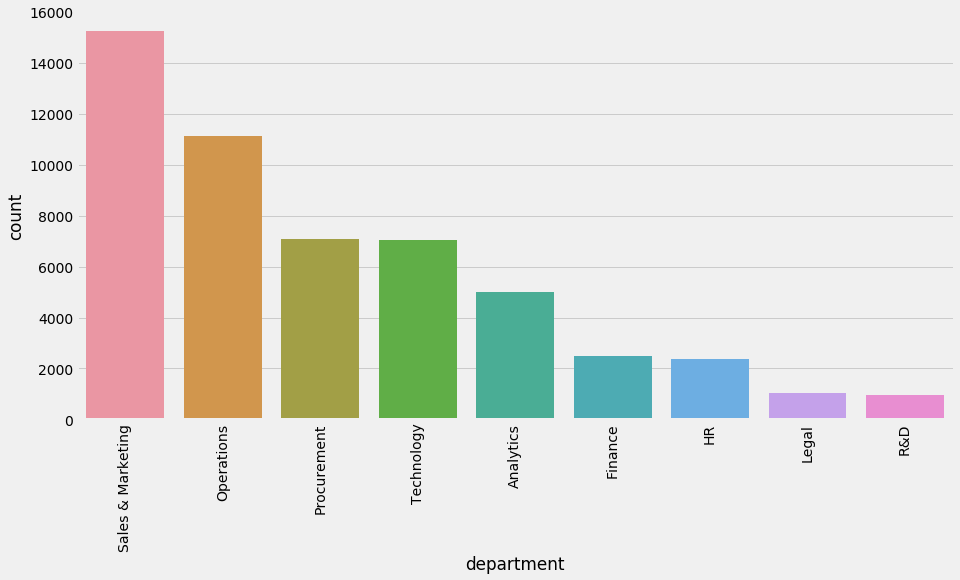

In [94]:
plt.figure(figsize=(14,7))
sns.countplot(df.department,order=df['department'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

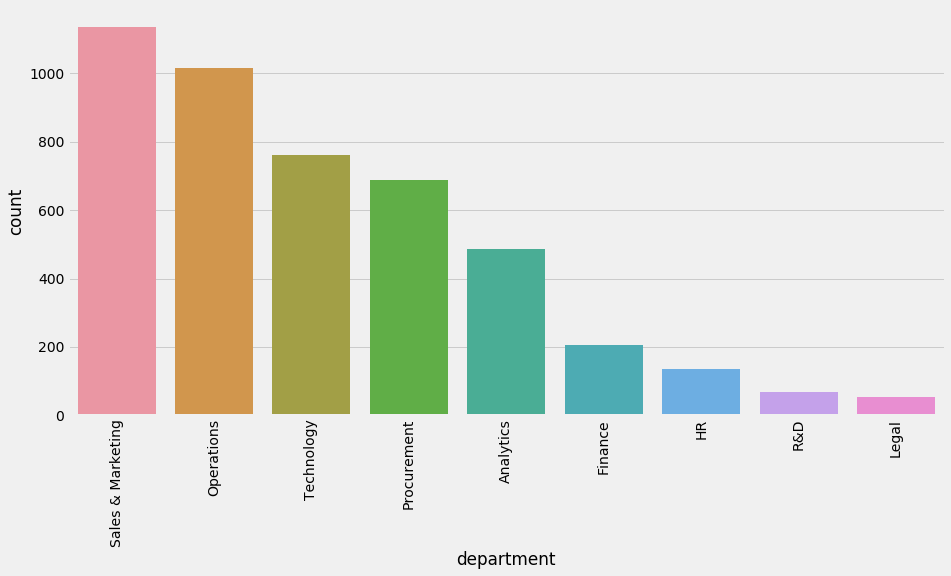

In [96]:
plt.figure(figsize=(14,7))
sns.countplot(yes.department,order=yes['department'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

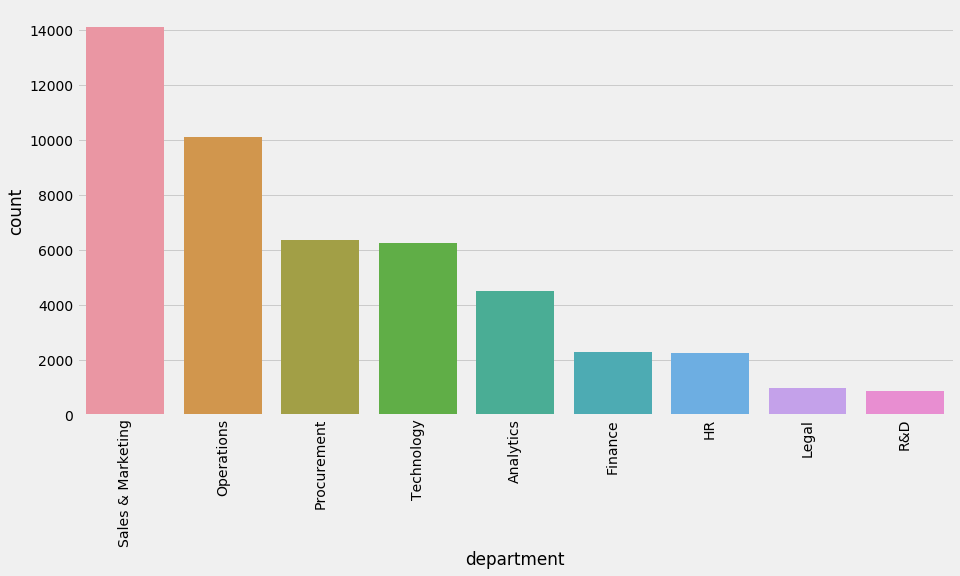

In [97]:
plt.figure(figsize=(14,7))
sns.countplot(no.department,order=no['department'].value_counts().index)
plt.xticks(rotation=90)

In [98]:
# so this chart doesn't helps insight anything as most of the values are promoted and not promoted are sorted as total

In [99]:
#now we are going to analyse degree wise

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

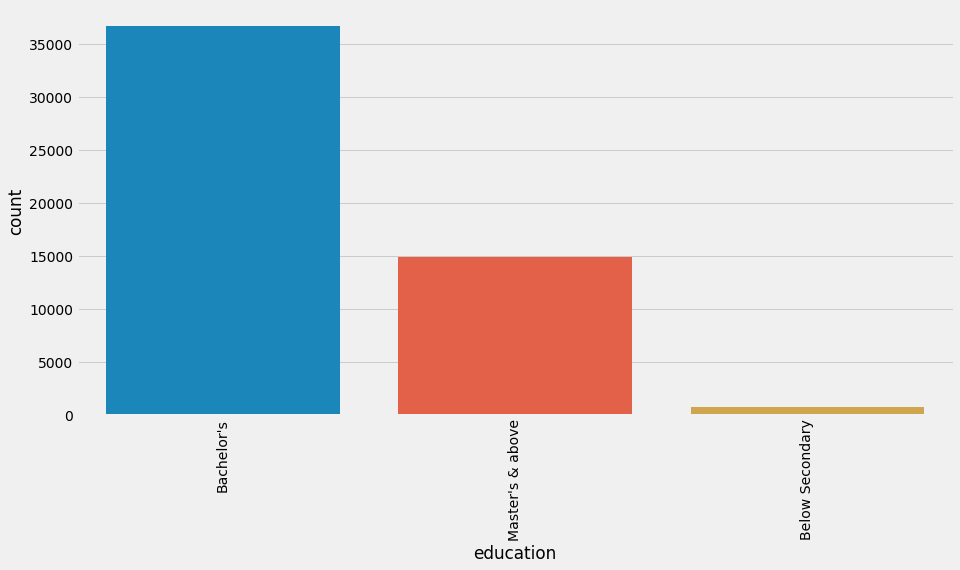

In [100]:
plt.figure(figsize=(14,7))
sns.countplot(df.education,order=df['education'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

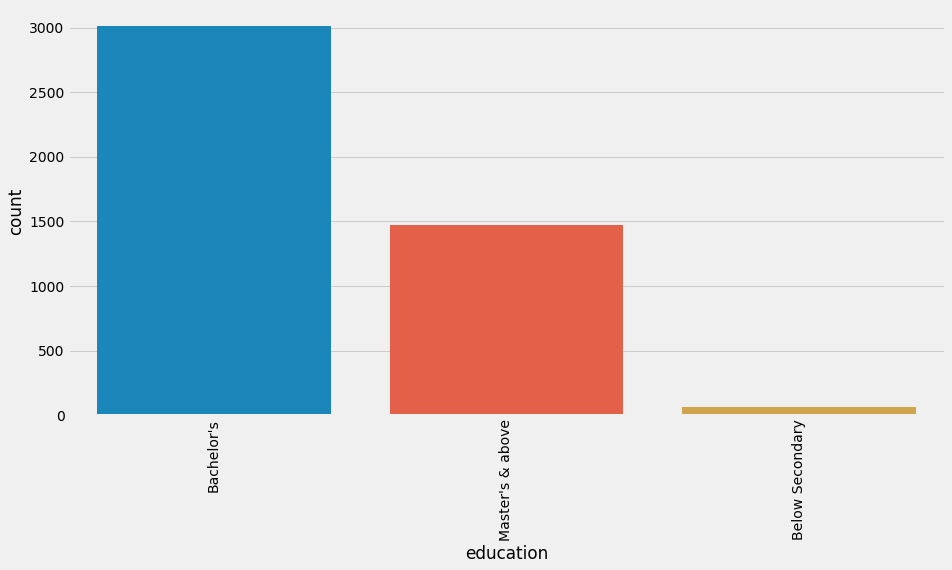

In [102]:
plt.figure(figsize=(14,7))
sns.countplot(yes.education,order=yes['education'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

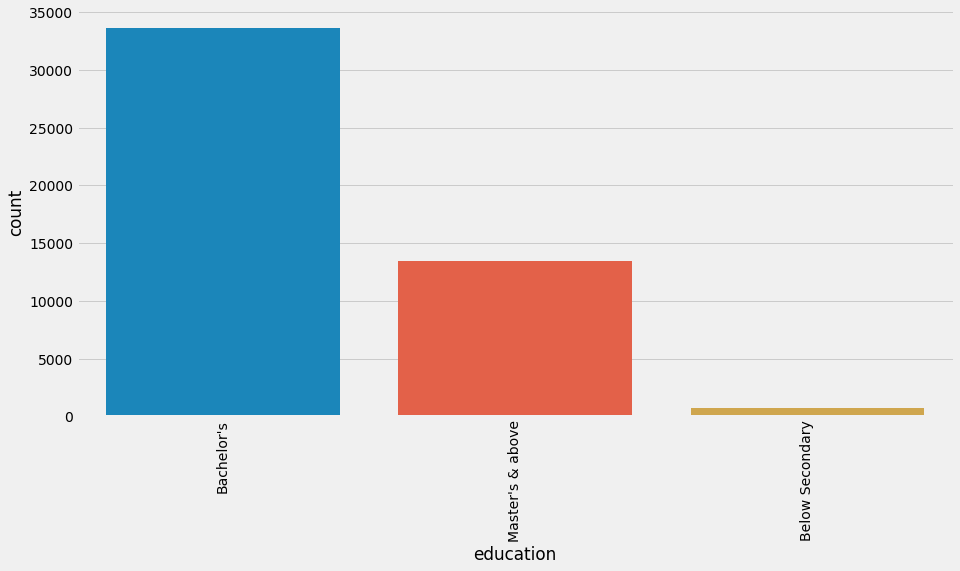

In [103]:
plt.figure(figsize=(14,7))
sns.countplot(no.education,order=no['education'].value_counts().index)
plt.xticks(rotation=90)

In [104]:
#this does as previous but now give preference to rating

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

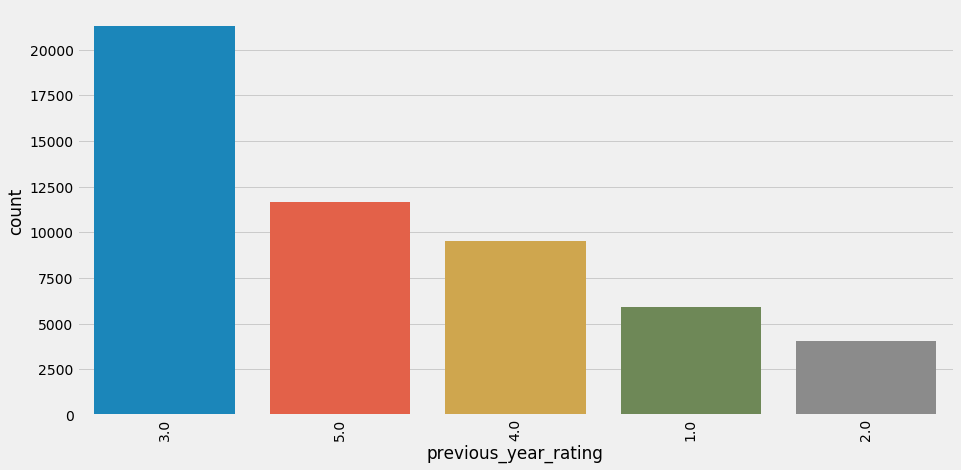

In [105]:
plt.figure(figsize=(14,7))
sns.countplot(df.previous_year_rating,order=df['previous_year_rating'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

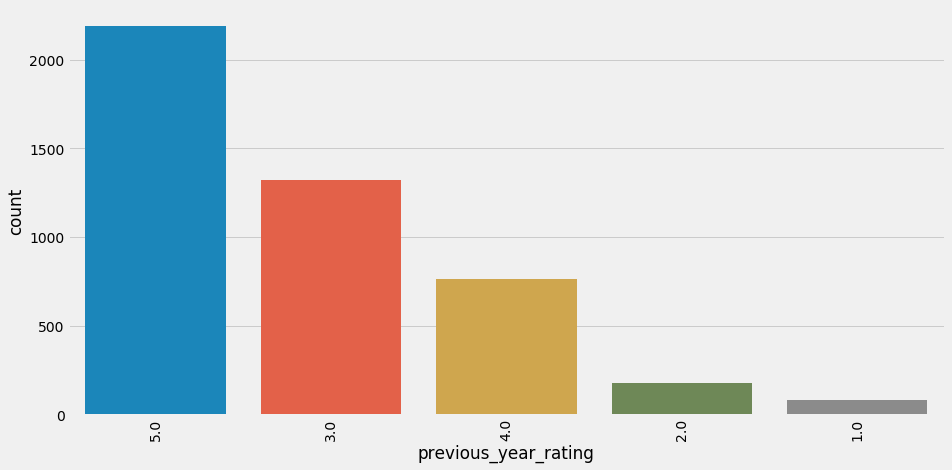

In [106]:
plt.figure(figsize=(14,7))
sns.countplot(yes.previous_year_rating,order=yes['previous_year_rating'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

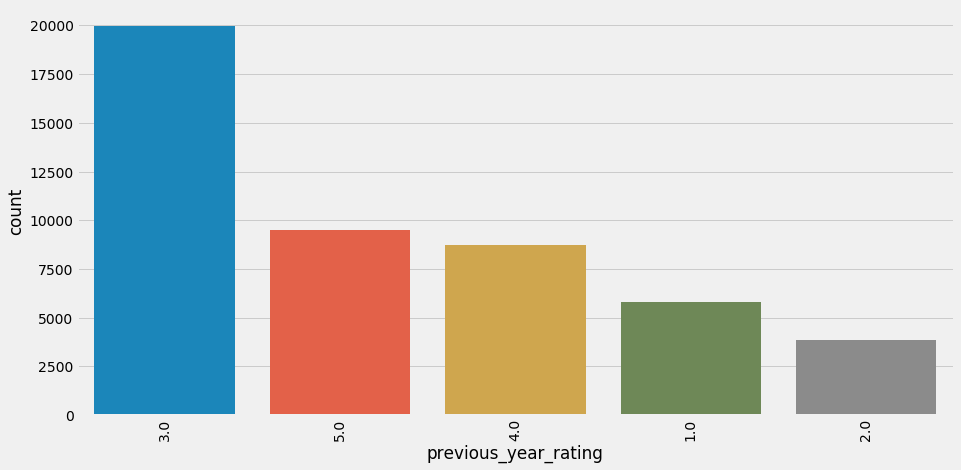

In [107]:
plt.figure(figsize=(14,7))
sns.countplot(no.previous_year_rating,order=no['previous_year_rating'].value_counts().index)
plt.xticks(rotation=90)

In [113]:
print(len(df[df['previous_year_rating']==5]),len(df))
print(len(yes.loc[df['previous_year_rating']==5]),len(yes))
print(len(no[df['previous_year_rating']==5]),len(no))

11676 52399
2189 4546
9487 47853


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#our values is not all dependent on this but it is quite important one compare to both of two we worked earlier